In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/cleanedData_20210804.csv', index_col=0, encoding='utf-8')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,6,12,36) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,car_brand,car_model,car_year,car_mileage,car_price,car_color,car_cylinderVolume,car_driveMode,car_fuel,car_gear,verified,car_address,car_title,car_photo,dealer_name,dealer_address,sunroof,TPMS,SRS,keyless,ESP,ABS,cruise_sys,HID_head,isofix,electric_seat,auto_AC,navi_sys,IVI_sys,leather_seat,parking_radar,parking_camera,BSM,LDW,source,car_door,car_seat,theft_alarm,central_lock,TCS,LED_head,SW_button,ACC
0,236581,TOYOTA,ALTIS,2009.0,197710.0,196000,黑,1800.0,2.0,汽油,手自排,1,高雄市,豐田ALTIS 1800cc 2009年 黑色0頭款可全貸,https://www.hotcar.com.tw/UPLOAD/CW/HF1002/260...,上暘汽車,高雄市鳥松區神農路856號,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,HOT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,236578,MITSUBISHI,DELICA,2016.0,81609.0,358000,深藍,2400.0,2.0,汽油,手排,1,高雄市,三菱得利卡2400cc 2016年框式附加吊桿0頭款可全貸,https://www.hotcar.com.tw/UPLOAD/CW/HF1002/260...,上暘汽車,高雄市鳥松區神農路856號,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,HOT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,236571,SUZUKI,CARRY,2013.0,53167.0,286000,銀,1600.0,2.0,汽油,手排,1,高雄市,鈴木吉利 1590cc 2013年銀色0頭款可全貸,https://www.hotcar.com.tw/UPLOAD/CW/HF1002/260...,上暘汽車,高雄市鳥松區神農路856號,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,HOT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,236495,NISSAN,MARCH,2013.0,92757.0,238000,淺綠,1500.0,2.0,汽油,自排,1,台中市,新手駕駛首選 顯眼 小台 好停車 好照顧,https://www.hotcar.com.tw/UPLOAD/CW/HD1076/260...,聖傑汽車(烏日店),台中市烏日區中山路三段903號,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,HOT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,236493,NISSAN,SENTRA,2015.0,43307.0,378000,白,1800.0,2.0,汽油,手自排,1,台中市,Aero 旗艦版 電動座椅調整 4安 多合一影音,https://www.hotcar.com.tw/UPLOAD/CW/HD1076/260...,聖傑汽車(烏日店),台中市烏日區中山路三段903號,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,HOT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
variables = ['car_brand', 'car_model', 'car_year', 'car_mileage', 'car_price',
       'car_color', 'car_cylinderVolume', 'car_driveMode', 'car_fuel',
       'car_gear', 'verified', 'car_door', 'car_seat']

In [40]:
df = df[variables]

# data clean

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85510 entries, 0 to 749
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_brand           85431 non-null  object 
 1   car_model           85417 non-null  object 
 2   car_year            85431 non-null  float64
 3   car_mileage         83319 non-null  float64
 4   car_price           85510 non-null  object 
 5   car_color           83487 non-null  object 
 6   car_cylinderVolume  85431 non-null  float64
 7   car_driveMode       79628 non-null  float64
 8   car_fuel            78764 non-null  object 
 9   car_gear            85076 non-null  object 
 10  verified            79807 non-null  object 
 11  car_door            45341 non-null  float64
 12  car_seat            71512 non-null  float64
dtypes: float64(6), object(7)
memory usage: 9.1+ MB


In [42]:
df.describe()

,car_year,car_mileage,car_cylinderVolume,car_driveMode,car_door,car_seat
count,85431.000000,8.331900e+04,8.543100e+04,79628.000000,45341.000000,71512.000000
mean,2013.348492,2.071478e+05,2.377541e+03,2.267670,4.395845,5.022024
std,4.509133,1.301508e+07,9.929318e+04,0.680954,0.847573,0.857808
min,1967.000000,0.000000e+00,0.000000e+00,2.000000,0.000000,0.000000
25%,2011.000000,4.597150e+04,1.600000e+03,2.000000,4.000000,5.000000
50%,2014.000000,8.020600e+04,2.000000e+03,2.000000,5.000000,5.000000
75%,2017.000000,1.300000e+05,2.100000e+03,2.000000,5.000000,5.000000
max,2022.000000,2.147484e+09,2.902180e+07,4.000000,6.000000,12.000000


In [45]:
# clean data & change data type
df['car_price'] = df['car_price'].astype(str)
df['car_price'] = df['car_price'].str.replace(',','')
df['car_price'] = pd.to_numeric(df['car_price'])
df['car_driveMode'] = df['car_driveMode'].astype(str)
df.loc[df['verified'].str.contains('[a-zA-Z]') == True, 'verified'] = 0
df['verified'] = pd.to_numeric(df['verified'])

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85510 entries, 0 to 749
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_brand           85431 non-null  object 
 1   car_model           85417 non-null  object 
 2   car_year            85431 non-null  float64
 3   car_mileage         83319 non-null  float64
 4   car_price           85510 non-null  float64
 5   car_color           83487 non-null  object 
 6   car_cylinderVolume  85431 non-null  float64
 7   car_driveMode       85510 non-null  object 
 8   car_fuel            78764 non-null  object 
 9   car_gear            85076 non-null  object 
 10  verified            85510 non-null  float64
 11  car_door            45341 non-null  float64
 12  car_seat            71512 non-null  float64
dtypes: float64(7), object(6)
memory usage: 9.1+ MB


In [47]:
#delete the data that price<=10000
indexNames = df[df['car_price']<=10000].index
df.drop(indexNames , inplace=True)
df.shape

(85363, 13)

In [48]:
#delete the data that price>8000000
df = df[df['car_price']<=8000000]
df.shape

(85217, 13)

In [49]:
# replace brand_name 中華 to CMC
df.loc[df['car_brand'].str.contains('中華') == True, 'car_brand'] = 'CMC'

In [50]:
df.loc[df['car_brand'].str.contains('BENZ') == True, 'car_brand'] = 'BENZ'
df.loc[df['car_brand'].str.contains('VOLKSWAGEN') == True, 'car_brand'] = 'VW'

In [51]:
# 看是否有空值
df.isnull().any()

car_brand              True
car_model              True
car_year               True
car_mileage            True
car_price             False
car_color              True
car_cylinderVolume     True
car_driveMode         False
car_fuel               True
car_gear               True
verified              False
car_door               True
car_seat               True
dtype: bool

In [52]:
# 空值用眾數填充
df_new = df
df_new['car_color'] = df_new['car_color'].fillna(df_new['car_color'].mode()[0])
df_new['car_driveMode'] = df_new['car_driveMode'].fillna(df_new['car_driveMode'].mode()[0])
df_new['car_fuel'] = df_new['car_fuel'].fillna(df_new['car_fuel'].mode()[0])
df_new['car_gear'] = df_new['car_gear'].fillna(df_new['car_gear'].mode()[0])
df_new['verified'] = df_new['verified'].fillna(df_new['verified'].mode()[0])
df_new['car_door'] = df_new['car_door'].fillna(df_new['car_door'].mode()[0])
df_new['car_seat'] = df_new['car_seat'].fillna(df_new['car_seat'].mode()[0])

In [53]:
# 檢查是否有空值
df_new.isnull().any().any()

True

In [ ]:
#看各品牌有多少不重複車款
#pd.set_option('display.max_rows', 100)
#df_new.groupby(['car_brand'])['car_model'].nunique()

# data exploration

In [54]:
df_new.head()

,car_brand,car_model,car_year,car_mileage,car_price,car_color,car_cylinderVolume,car_driveMode,car_fuel,car_gear,verified,car_door,car_seat
0,TOYOTA,ALTIS,2009.0,197710.0,196000.0,黑,1800.0,2.0,汽油,手自排,1.0,5.0,5.0
1,MITSUBISHI,DELICA,2016.0,81609.0,358000.0,深藍,2400.0,2.0,汽油,手排,1.0,5.0,5.0
2,SUZUKI,CARRY,2013.0,53167.0,286000.0,銀,1600.0,2.0,汽油,手排,1.0,5.0,5.0
3,NISSAN,MARCH,2013.0,92757.0,238000.0,淺綠,1500.0,2.0,汽油,自排,1.0,5.0,5.0
4,NISSAN,SENTRA,2015.0,43307.0,378000.0,白,1800.0,2.0,汽油,手自排,1.0,5.0,5.0


In [55]:
df_new['car_price'].describe()

count    8.521700e+04
mean     6.725430e+05
std      6.423125e+05
min      1.500000e+04
25%      2.850000e+05
50%      4.580000e+05
75%      7.980000e+05
max      8.000000e+06
Name: car_price, dtype: float64

In [56]:
df_new['car_brand'].describe()

count      85138
unique        68
top       TOYOTA
freq       14159
Name: car_brand, dtype: object

In [57]:
#data is not balance
pd.set_option('display.max_rows', 100)
df_new['car_brand'].value_counts()

TOYOTA          14159
BENZ            11131
BMW              8666
HONDA            5645
MITSUBISHI       5628
NISSAN           5543
MAZDA            5398
FORD             5250
VW               3620
HYUNDAI          3129
LUXGEN           2835
LEXUS            2722
AUDI             2171
SUZUKI           1837
PORSCHE          1227
VOLVO            1019
SUBARU            860
CMC               697
MINI              651
SKODA             527
INFINITI          522
MASERATI          239
PEUGEOT           220
KIA               217
LAND ROVER        146
ISUZU             134
JAGUAR            131
SMART             115
HINO               82
DAIHATSU           80
BENTLEY            59
SAAB               55
PROTON             38
ALFA ROMEO         35
DFSK               34
TOBE               31
TESLA              26
CHEVROLET          22
SSANGYONG          22
CHRYSLER           16
MAHINDRA           16
FIAT               15
OPEL               15
JEEP               13
ŠKODA              12
CITROEN   

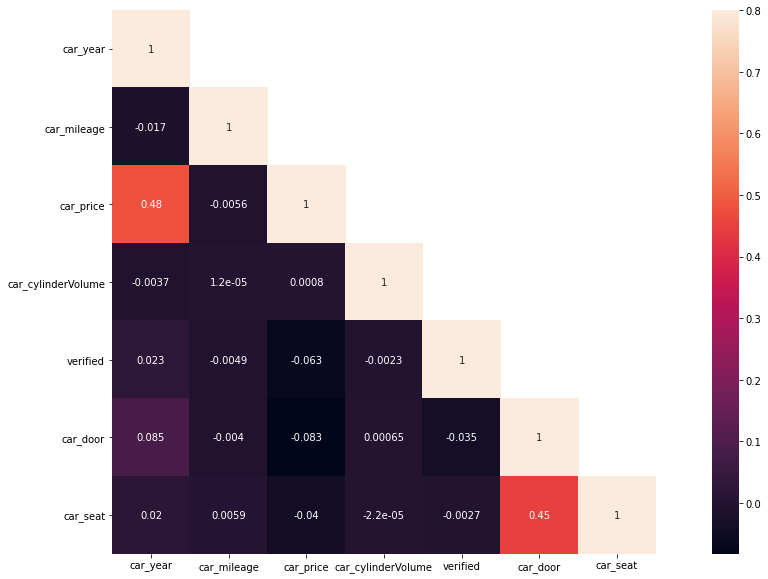

In [59]:
#相關係數低，且有認證車子竟然相關係數為負?
corrMat = df_new[['car_brand', 'car_model', 'car_year', 'car_mileage', 'car_price',
       'car_color', 'car_cylinderVolume', 'car_driveMode', 'car_fuel',
       'car_gear', 'verified', 'car_door', 'car_seat']].corr()
mask = np.array(corrMat)
mask[np.tril_indices_from(mask)] = False
plt.subplots(figsize=(20,10))
sns.heatmap(corrMat, mask=mask,vmax=.8, square=True,annot=True)

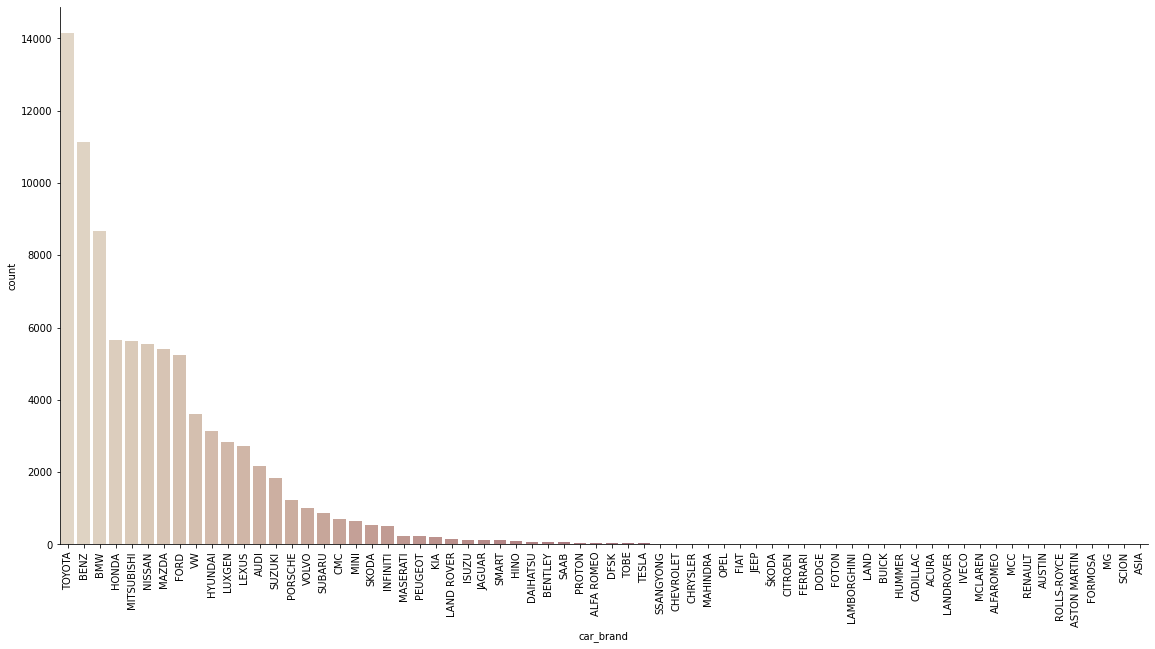

In [60]:
#車子品牌分布不均(多為toyota)
var = "car_brand"
#plt.figure(figsize=(20, 10))
plot_order = df_new.groupby('car_brand')['car_price'].count().sort_values(ascending=False).index.values
sns.catplot(x=var, kind="count", palette="ch:.25", height=8, aspect=2, data=df_new, order=plot_order);
plt.xticks(rotation=90);

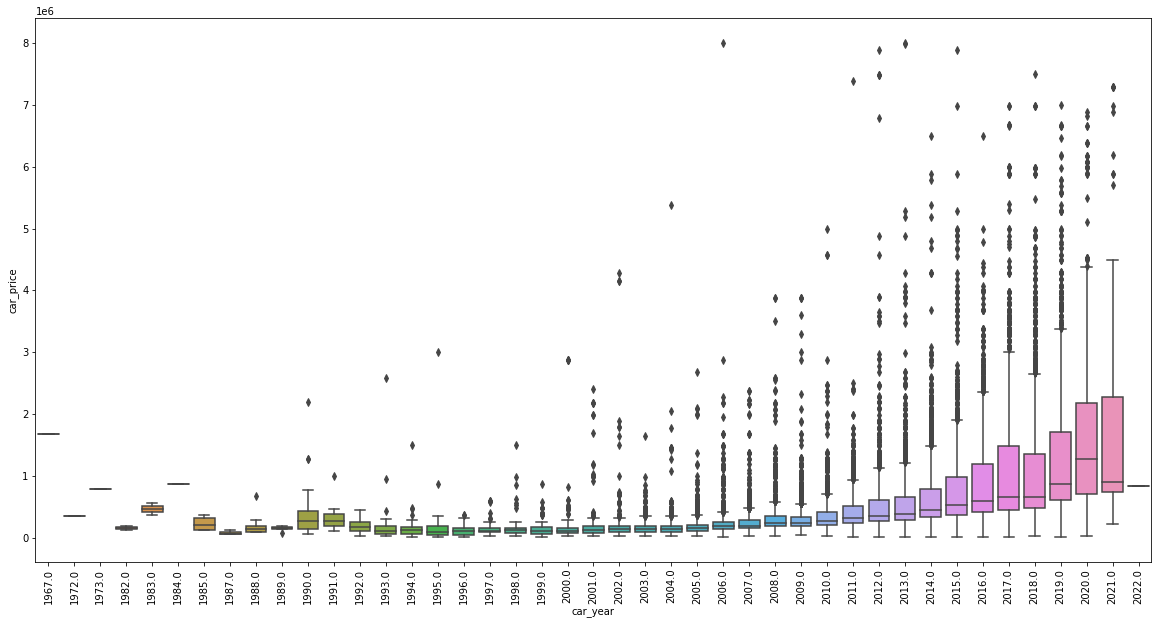

In [61]:
#各車款皆有偏離很大之離群值(是否該刪除?)
var = 'car_year'
data = pd.concat([df_new['car_price'], df_new[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="car_price", data=data.sort_values('car_price',ascending=False))
#fig.axis(ymin=0, ymax=165);
plt.xticks(rotation=90);

In [62]:
df_new.head()

,car_brand,car_model,car_year,car_mileage,car_price,car_color,car_cylinderVolume,car_driveMode,car_fuel,car_gear,verified,car_door,car_seat
0,TOYOTA,ALTIS,2009.0,197710.0,196000.0,黑,1800.0,2.0,汽油,手自排,1.0,5.0,5.0
1,MITSUBISHI,DELICA,2016.0,81609.0,358000.0,深藍,2400.0,2.0,汽油,手排,1.0,5.0,5.0
2,SUZUKI,CARRY,2013.0,53167.0,286000.0,銀,1600.0,2.0,汽油,手排,1.0,5.0,5.0
3,NISSAN,MARCH,2013.0,92757.0,238000.0,淺綠,1500.0,2.0,汽油,自排,1.0,5.0,5.0
4,NISSAN,SENTRA,2015.0,43307.0,378000.0,白,1800.0,2.0,汽油,手自排,1.0,5.0,5.0


In [ ]:
#待考量要不要把車型放進去
# pd.set_option('display.max_rows', 100)
# k = df_new['car_model'].value_counts()>50
# print(k[k==True])
#indexNames = df[df['car_price']<=10000].index
#df.drop(indexNames , inplace=True)
#df.shape

# data engineering

In [63]:
#normalize the data
#不確定car_driveMode	car_door	car_seat要不要被normalize(有次序之分?)
from sklearn import preprocessing
df_new['car_year'] = preprocessing.scale(df_new['car_year'])
df_new['car_mileage'] = preprocessing.scale(df_new['car_mileage'])
df_new['car_cylinderVolume'] = preprocessing.scale(df_new['car_cylinderVolume'])

df_new['car_driveMode'] = preprocessing.scale(df_new['car_driveMode'])
df_new['car_door'] = preprocessing.scale(df_new['car_door'])
df_new['car_seat'] = preprocessing.scale(df_new['car_seat'])

In [64]:
df_new.head()

,car_brand,car_model,car_year,car_mileage,car_price,car_color,car_cylinderVolume,car_driveMode,car_fuel,car_gear,verified,car_door,car_seat
0,TOYOTA,ALTIS,-0.963405,-0.000763,196000.0,黑,-0.005801,-0.391966,汽油,手自排,1.0,0.466487,-0.023824
1,MITSUBISHI,DELICA,0.589146,-0.009668,358000.0,深藍,0.000231,-0.391966,汽油,手排,1.0,0.466487,-0.023824
2,SUZUKI,CARRY,-0.076233,-0.011850,286000.0,銀,-0.007812,-0.391966,汽油,手排,1.0,0.466487,-0.023824
3,NISSAN,MARCH,-0.076233,-0.008813,238000.0,淺綠,-0.008817,-0.391966,汽油,自排,1.0,0.466487,-0.023824
4,NISSAN,SENTRA,0.367353,-0.012606,378000.0,白,-0.005801,-0.391966,汽油,手自排,1.0,0.466487,-0.023824


skew:  2.780630947649927


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


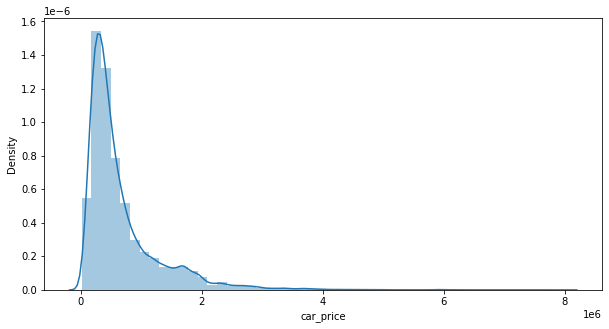

In [65]:
#右偏→要取log變成正態分布  #normalize the data?
plt.figure(figsize = (10,5))
print("skew: ",df_new['car_price'].skew())
sns.distplot(df_new['car_price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


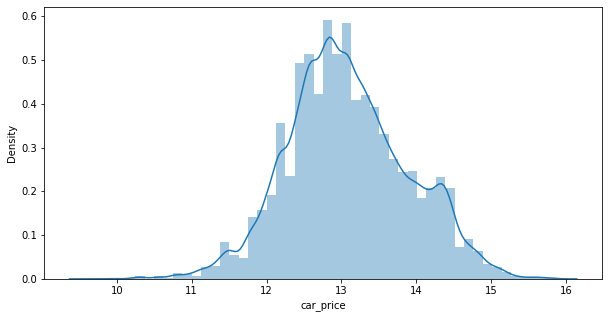

In [66]:
target = np.log(df_new['car_price'])
plt.figure(figsize = (10,5))
sns.distplot(target)
df_new['car_price'] = target

In [67]:
df2 = df_new#.drop(['source'], axis=1)
df2.head()
df_dummy = pd.get_dummies(df2)
df_dummy.head()

,car_year,car_mileage,car_price,car_cylinderVolume,car_driveMode,verified,car_door,car_seat,car_brand_ACURA,car_brand_ALFA ROMEO,car_brand_ALFAROMEO,car_brand_ASIA,car_brand_ASTON MARTIN,car_brand_AUDI,car_brand_AUSTIN,car_brand_BENTLEY,car_brand_BENZ,car_brand_BMW,car_brand_BUICK,car_brand_CADILLAC,car_brand_CHEVROLET,car_brand_CHRYSLER,car_brand_CITROEN,car_brand_CMC,car_brand_DAIHATSU,car_brand_DFSK,car_brand_DODGE,car_brand_FERRARI,car_brand_FIAT,car_brand_FORD,car_brand_FORMOSA,car_brand_FOTON,car_brand_HINO,car_brand_HONDA,car_brand_HUMMER,car_brand_HYUNDAI,car_brand_INFINITI,car_brand_ISUZU,car_brand_IVECO,car_brand_JAGUAR,...,car_color_銀灰,car_color_銀灰黑,car_color_銀白紅,car_color_銀黑,car_color_銀黑白,car_color_鋼鐵藍,car_color_鐵灰,car_color_雲河,car_color_風信子紅,car_color_香檳金,car_color_香檳金灰,car_color_魂動紅,car_color_黃,car_color_黃深棕,car_color_黃白,car_color_黃黑,car_color_黑,car_color_黑 深紅,car_color_黑 灰,car_color_黑.深紅,car_color_黑.紅,car_color_黑曜藍,car_color_黑灰,car_color_黑灰雙,car_color_黑爵黑,car_color_黑白,car_color_黑紅,car_color_黑紫,car_color_黑藍,car_color_黑銀,car_color_黑鐵灰,car_fuel_柴油,car_fuel_柴電,car_fuel_汽油,car_fuel_油電,car_fuel_電動,car_gear_手排,car_gear_手自排,car_gear_自手排,car_gear_自排
0,-0.963405,-0.000763,12.185870,-0.005801,-0.391966,1.0,0.466487,-0.023824,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,0.589146,-0.009668,12.788288,0.000231,-0.391966,1.0,0.466487,-0.023824,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,-0.076233,-0.011850,12.563747,-0.007812,-0.391966,1.0,0.466487,-0.023824,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,-0.076233,-0.008813,12.380026,-0.008817,-0.391966,1.0,0.466487,-0.023824,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,0.367353,-0.012606,12.842649,-0.005801,-0.391966,1.0,0.466487,-0.023824,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [68]:
df_dummy.shape

(85217, 5433)

In [69]:
# 檢查是否有空值
# pd.set_option('display.max_rows', None)
df_dummy.isnull().any().any()

True

In [78]:
df_dummy.isnull().any()

car_year               True
car_mileage            True
car_price             False
car_cylinderVolume     True
car_driveMode         False
                      ...  
car_fuel_電動           False
car_gear_手排           False
car_gear_手自排          False
car_gear_自手排          False
car_gear_自排           False
Length: 5433, dtype: bool

In [80]:
#填補空值
# 空值用眾數填充
df_dummy['car_driveMode'] = df_dummy['car_driveMode'].fillna(df_dummy['car_driveMode'].mode()[0])
df_dummy['verified'] = df_dummy['verified'].fillna(df_dummy['verified'].mode()[0])
df_dummy['car_door'] = df_dummy['car_door'].fillna(df_dummy['car_door'].mode()[0])
df_dummy['car_seat'] = df_dummy['car_seat'].fillna(df_dummy['car_seat'].mode()[0])
df_dummy['car_year'] = df_dummy['car_year'].fillna(df_dummy['car_year'].mode()[0])
df_dummy['car_mileage'] = df_dummy['car_mileage'].fillna(df_dummy['car_mileage'].mode()[0])
df_dummy['car_cylinderVolume'] = df_dummy['car_cylinderVolume'].fillna(df_dummy['car_cylinderVolume'].mode()[0])

In [81]:
df_dummy.isnull().any().any()

False

In [82]:
df_dummy.head

<bound method NDFrame.head of      car_year  car_mileage  car_price  ...  car_gear_手自排  car_gear_自手排  car_gear_自排
0   -0.963405    -0.000763  12.185870  ...             1             0            0
1    0.589146    -0.009668  12.788288  ...             0             0            0
2   -0.076233    -0.011850  12.563747  ...             0             0            0
3   -0.076233    -0.008813  12.380026  ...             0             0            1
4    0.367353    -0.012606  12.842649  ...             1             0            0
..        ...          ...        ...  ...           ...           ...          ...
745 -0.519819    -0.010208  12.429216  ...             1             0            0
746  0.367353    -0.012093  12.429216  ...             1             0            0
747 -0.963405    -0.007682  12.429216  ...             1             0            0
748 -0.963405     0.004833  12.429216  ...             1             0            0
749  0.145560    -0.010828  12.429216  ...    

# modeling

In [83]:
#slc把價格去掉
slc = list(range(df_dummy.shape[1]))
slc.remove(2)

X = df_dummy.iloc[:, slc]
X.shape

(85217, 5432)

In [84]:
X.head()

,car_year,car_mileage,car_cylinderVolume,car_driveMode,verified,car_door,car_seat,car_brand_ACURA,car_brand_ALFA ROMEO,car_brand_ALFAROMEO,car_brand_ASIA,car_brand_ASTON MARTIN,car_brand_AUDI,car_brand_AUSTIN,car_brand_BENTLEY,car_brand_BENZ,car_brand_BMW,car_brand_BUICK,car_brand_CADILLAC,car_brand_CHEVROLET,car_brand_CHRYSLER,car_brand_CITROEN,car_brand_CMC,car_brand_DAIHATSU,car_brand_DFSK,car_brand_DODGE,car_brand_FERRARI,car_brand_FIAT,car_brand_FORD,car_brand_FORMOSA,car_brand_FOTON,car_brand_HINO,car_brand_HONDA,car_brand_HUMMER,car_brand_HYUNDAI,car_brand_INFINITI,car_brand_ISUZU,car_brand_IVECO,car_brand_JAGUAR,car_brand_JEEP,...,car_color_銀灰,car_color_銀灰黑,car_color_銀白紅,car_color_銀黑,car_color_銀黑白,car_color_鋼鐵藍,car_color_鐵灰,car_color_雲河,car_color_風信子紅,car_color_香檳金,car_color_香檳金灰,car_color_魂動紅,car_color_黃,car_color_黃深棕,car_color_黃白,car_color_黃黑,car_color_黑,car_color_黑 深紅,car_color_黑 灰,car_color_黑.深紅,car_color_黑.紅,car_color_黑曜藍,car_color_黑灰,car_color_黑灰雙,car_color_黑爵黑,car_color_黑白,car_color_黑紅,car_color_黑紫,car_color_黑藍,car_color_黑銀,car_color_黑鐵灰,car_fuel_柴油,car_fuel_柴電,car_fuel_汽油,car_fuel_油電,car_fuel_電動,car_gear_手排,car_gear_手自排,car_gear_自手排,car_gear_自排
0,-0.963405,-0.000763,-0.005801,-0.391966,1.0,0.466487,-0.023824,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,0.589146,-0.009668,0.000231,-0.391966,1.0,0.466487,-0.023824,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,-0.076233,-0.011850,-0.007812,-0.391966,1.0,0.466487,-0.023824,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,-0.076233,-0.008813,-0.008817,-0.391966,1.0,0.466487,-0.023824,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,0.367353,-0.012606,-0.005801,-0.391966,1.0,0.466487,-0.023824,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [85]:
y = df_dummy.loc[:,['car_price']]
print(y.shape)
y.head()

(85217, 1)


,car_price
0,12.185870
1,12.788288
2,12.563747
3,12.380026
4,12.842649


In [ ]:
#PCA降維度
# https://365datascience.com/tutorials/python-tutorials/pca-k-means/

In [86]:
df_dummy.isnull().any().any()

False

In [87]:
from sklearn.decomposition import PCA
#first of all, fit the data using pca
pca2 = PCA(30)
data2 = pca2.fit_transform(X)

In [ ]:
#secondly, decide features based on the variance
pca2.explained_variance_ratio_

array([0.15418022, 0.11732998, 0.10353723, 0.10343464, 0.09551556,
       0.05745504, 0.03523856, 0.02894713, 0.02280122, 0.01708198,
       0.01613991, 0.01415905, 0.01331916, 0.01199268, 0.01084116,
       0.01007589, 0.00830077, 0.00746665, 0.00715791, 0.00675107,
       0.00669398, 0.00559233, 0.00454232, 0.00419886, 0.00408673,
       0.00392753, 0.00366417, 0.00341823, 0.00271391, 0.00236716])

Text(0, 0.5, 'Cumulated Explained Variance')

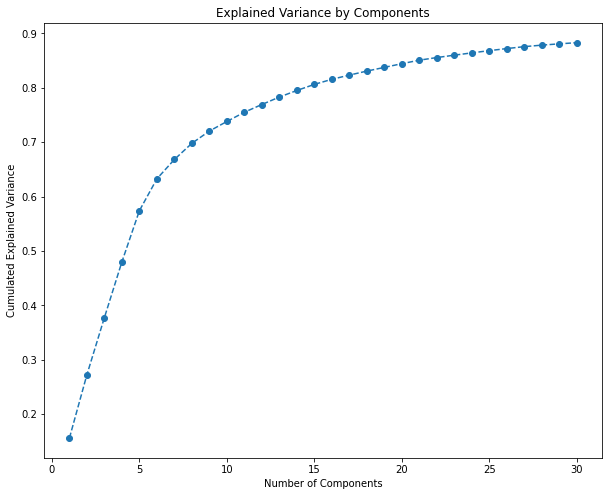

In [88]:
plt.figure(figsize = (10, 8))
plt.plot(range(1,31), pca2.explained_variance_ratio_.cumsum(), marker = 'o', linestyle= '--')
plt.title("Explained Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulated Explained Variance")

In [89]:
#choose 30 componets based on the graph
pca = PCA(n_components = 30)

In [90]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.transform(X)

array([[-1.56959850e-01,  9.62733811e-01, -3.92405405e-02, ...,
        -4.12109420e-03, -1.72614839e-02,  2.70246011e-02],
       [-2.61068530e-01, -3.29504706e-02, -1.18744019e-01, ...,
         5.12233991e-01, -2.72109836e-04, -8.71597129e-02],
       [-1.77265489e-01,  4.66820260e-01, -8.97460953e-02, ...,
         6.52349991e-01,  5.26077497e-01,  7.21082444e-01],
       ...,
       [-1.86787499e+00,  1.23478134e+00, -3.11762462e-02, ...,
         9.42061170e-02,  2.41781022e-02, -7.04166508e-04],
       [ 7.46363960e-01,  6.21008405e-01, -7.05329711e-02, ...,
        -1.16630674e-02, -1.53909201e-02, -3.07488639e-02],
       [-1.30364501e-01,  1.16065880e+00, -3.26429955e-02, ...,
        -1.39024290e-02, -1.04576592e-02,  3.87636593e-02]])

In [91]:
scores_pca = pca.transform(X)
df_scores_pca = pd.DataFrame(scores_pca)

In [92]:
#rename column name
df_scores_pca.columns = ["component"+str(i) for i in df_scores_pca.columns]
df_scores_pca

,component0,component1,component2,component3,component4,component5,component6,component7,component8,component9,component10,component11,component12,component13,component14,component15,component16,component17,component18,component19,component20,component21,component22,component23,component24,component25,component26,component27,component28,component29
0,-0.166993,0.984377,-0.026616,-0.085293,-0.222219,-0.248019,0.736502,-0.509791,0.820146,-0.438451,0.507172,0.431649,0.518524,-0.371107,0.072564,0.193165,-0.009559,-0.004529,0.015230,0.035879,0.100330,-0.101896,-0.046810,-0.007705,0.020528,-0.026752,0.007131,-0.015298,0.020056,0.019900
1,-0.239419,-0.132447,-0.003180,-0.074965,0.600568,-0.344359,-0.432483,-0.417353,0.493322,0.662368,0.333075,-0.189787,0.059916,0.195198,-0.245612,0.687833,0.753455,0.120493,-0.376390,-0.605370,0.023451,-0.237811,0.031008,0.035608,0.067444,0.448839,-0.318148,0.026758,-0.089881,0.093373
2,-0.159520,0.435452,-0.019767,-0.086885,0.197253,-0.386469,-0.366729,-0.402145,0.599761,0.624996,0.082167,-0.122918,0.345072,0.589932,-0.487314,0.033232,0.099035,0.164692,-0.222459,-0.224700,-0.084277,-0.231500,-0.106016,-0.315530,-0.302552,0.825611,-0.350234,0.476665,0.731149,-0.197095
3,-0.228829,0.525223,-0.028235,-0.101467,0.206857,-0.487127,-0.870524,-0.429774,0.637884,0.072733,0.296784,-0.382776,-0.462357,0.139269,-0.028012,-0.118178,-0.133087,-0.326834,0.150162,0.138107,0.554411,-0.197177,0.053558,0.072778,0.089660,0.005645,-0.012786,-0.040366,-0.035303,0.082095
4,-0.389177,-0.173751,-0.019050,-0.082826,0.634227,-0.341960,0.205259,0.545710,0.623676,0.147809,0.444689,-0.277177,-0.207597,0.065847,-0.073764,-0.056745,-0.228896,-0.308237,0.107313,0.016226,0.785677,-0.335458,0.062790,-0.007028,-0.001796,-0.080879,-0.017344,-0.030120,0.054656,-0.033966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85212,1.791800,0.441943,-0.019292,-0.047846,0.016155,1.702272,0.369050,-0.008104,0.007532,0.054808,-0.680862,-0.149838,0.110942,0.562471,-0.437415,-0.167597,-0.416774,0.099930,-0.040156,-0.076676,0.031912,0.075890,-0.046677,-0.058686,-0.044893,-0.094927,0.082089,0.100172,0.139178,0.041505
85213,1.635847,-0.398441,-0.024330,-0.038517,0.638611,1.692668,0.144771,0.774778,-0.176517,-0.211636,-0.202206,-0.124782,-0.174945,-0.015786,-0.084988,0.088429,-0.222378,-0.019445,0.033547,-0.049096,0.083823,0.125952,-0.024719,0.002406,-0.021491,-0.048351,0.031457,0.066466,0.066043,0.034129
85214,0.860868,0.887681,-0.016526,-0.067773,-0.254567,0.652101,0.564162,-0.014978,-0.003411,0.118808,-0.586290,-0.071139,0.162753,0.615637,-0.413664,-0.178399,-0.438884,0.117661,-0.076300,-0.100110,0.078212,0.418417,0.593982,-0.139698,-0.146148,0.041080,-0.229158,0.014875,0.030619,0.452907
85215,-0.144402,0.921488,-0.028390,-0.069936,-0.234167,-0.401695,0.679872,-0.028488,-0.173279,0.136845,-0.260372,-0.167159,0.031996,0.041942,-0.095523,0.150876,-0.088382,-0.184729,0.118785,0.136763,0.053597,0.285245,-0.106558,0.468683,0.691639,0.395622,-0.043369,0.045489,-0.013245,-0.069842


In [93]:
data_original = pd.concat([df_dummy.reset_index(drop = True), df_scores_pca], axis =1)
data_normalization = pd.concat([df.reset_index(drop = True), df_scores_pca], axis =1)

In [94]:
data_original.head()

,car_year,car_mileage,car_price,car_cylinderVolume,car_driveMode,verified,car_door,car_seat,car_brand_ACURA,car_brand_ALFA ROMEO,car_brand_ALFAROMEO,car_brand_ASIA,car_brand_ASTON MARTIN,car_brand_AUDI,car_brand_AUSTIN,car_brand_BENTLEY,car_brand_BENZ,car_brand_BMW,car_brand_BUICK,car_brand_CADILLAC,car_brand_CHEVROLET,car_brand_CHRYSLER,car_brand_CITROEN,car_brand_CMC,car_brand_DAIHATSU,car_brand_DFSK,car_brand_DODGE,car_brand_FERRARI,car_brand_FIAT,car_brand_FORD,car_brand_FORMOSA,car_brand_FOTON,car_brand_HINO,car_brand_HONDA,car_brand_HUMMER,car_brand_HYUNDAI,car_brand_INFINITI,car_brand_ISUZU,car_brand_IVECO,car_brand_JAGUAR,...,car_color_黑鐵灰,car_fuel_柴油,car_fuel_柴電,car_fuel_汽油,car_fuel_油電,car_fuel_電動,car_gear_手排,car_gear_手自排,car_gear_自手排,car_gear_自排,component0,component1,component2,component3,component4,component5,component6,component7,component8,component9,component10,component11,component12,component13,component14,component15,component16,component17,component18,component19,component20,component21,component22,component23,component24,component25,component26,component27,component28,component29
0,-0.963405,-0.000763,12.185870,-0.005801,-0.391966,1.0,0.466487,-0.023824,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,-0.166993,0.984377,-0.026616,-0.085293,-0.222219,-0.248019,0.736502,-0.509791,0.820146,-0.438451,0.507172,0.431649,0.518524,-0.371107,0.072564,0.193165,-0.009559,-0.004529,0.015230,0.035879,0.100330,-0.101896,-0.046810,-0.007705,0.020528,-0.026752,0.007131,-0.015298,0.020056,0.019900
1,0.589146,-0.009668,12.788288,0.000231,-0.391966,1.0,0.466487,-0.023824,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,-0.239419,-0.132447,-0.003180,-0.074965,0.600568,-0.344359,-0.432483,-0.417353,0.493322,0.662368,0.333075,-0.189787,0.059916,0.195198,-0.245612,0.687833,0.753455,0.120493,-0.376390,-0.605370,0.023451,-0.237811,0.031008,0.035608,0.067444,0.448839,-0.318148,0.026758,-0.089881,0.093373
2,-0.076233,-0.011850,12.563747,-0.007812,-0.391966,1.0,0.466487,-0.023824,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,-0.159520,0.435452,-0.019767,-0.086885,0.197253,-0.386469,-0.366729,-0.402145,0.599761,0.624996,0.082167,-0.122918,0.345072,0.589932,-0.487314,0.033232,0.099035,0.164692,-0.222459,-0.224700,-0.084277,-0.231500,-0.106016,-0.315530,-0.302552,0.825611,-0.350234,0.476665,0.731149,-0.197095
3,-0.076233,-0.008813,12.380026,-0.008817,-0.391966,1.0,0.466487,-0.023824,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,-0.228829,0.525223,-0.028235,-0.101467,0.206857,-0.487127,-0.870524,-0.429774,0.637884,0.072733,0.296784,-0.382776,-0.462357,0.139269,-0.028012,-0.118178,-0.133087,-0.326834,0.150162,0.138107,0.554411,-0.197177,0.053558,0.072778,0.089660,0.005645,-0.012786,-0.040366,-0.035303,0.082095
4,0.367353,-0.012606,12.842649,-0.005801,-0.391966,1.0,0.466487,-0.023824,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,-0.389177,-0.173751,-0.019050,-0.082826,0.634227,-0.341960,0.205259,0.545710,0.623676,0.147809,0.444689,-0.277177,-0.207597,0.065847,-0.073764,-0.056745,-0.228896,-0.308237,0.107313,0.016226,0.785677,-0.335458,0.062790,-0.007028,-0.001796,-0.080879,-0.017344,-0.030120,0.054656,-0.033966


In [ ]:
#model

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_scores_pca, y, test_size = 0.2, random_state = 25)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25) 

In [96]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)
print("Accuracy on Traing set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

Accuracy on Traing set:  0.7427102469943847
Accuracy on Testing set:  -568.0012497522598


In [97]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred= rf_reg.predict(X_test)
print("Accuracy on Trainng set: ",rf_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",rf_reg.score(X_test,y_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy on Trainng set:  0.975802338525595
Accuracy on Testing set:  0.8527570101277833


In [98]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared          : ', metrics.r2_score(y_test, y_pred))

		Error Table
Mean Absolute Error      :  0.19398025012970643
Mean Squared  Error      :  0.09507613809388686
Root Mean Squared  Error :  0.30834418770894134
R Squared          :  0.8527570101277833


看間距

In [ ]:
# https://machinelearningmastery.com/prediction-intervals-for-deep-learning-neural-networks/
# 看間距
from numpy import asarray
yhat = asarray(y_pred)
# calculate 95% gaussian prediction interval
# interval = 1.96 * yhat.std()
# calculate 68% gaussian prediction interval
interval = 1 * yhat.std()

lower, upper = yhat - interval, yhat + interval

In [ ]:
import math
e = 2.71828182845904523536028747135266249775724709369995
print(math.pow( e, 12.94140437 ))  #原始預測資料
print(math.pow( e, 12.17913008 ))  #原始預測資料-標準差
print(math.pow( e, 13.70367867 ))  #原始預測資料+標準差

In [ ]:
# 0722 way2
# https://github.com/abhashpanwar/used-car-price-prediction/blob/master/ml-models.ipynb

In [99]:
import pandas as pd
import numpy as np
import time
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt

#libraries for preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#libraries for evaluation
from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split


#libraries for models
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV,RidgeCV
from yellowbrick.regressor import AlphaSelection

from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.ensemble import AdaBoostRegressor

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [100]:
#function to split dataset int training and test
def trainingData(df_scores_pca,y,n):
    X = df_scores_pca
    y = y.values.T[0]
    X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=0)
    return (X_train,X_test,y_train,y_test)

X_train,X_test,y_train,y_test=trainingData(df_scores_pca,y,list(range(len(list(df_scores_pca.columns))-1)))
# X_train.reset_index(drop=True, inplace=True)
# X_test.reset_index(drop=True, inplace=True)
#y_train.reset_index(drop=True, inplace=True)
#y_test.reset_index(drop=True, inplace=True)

In [101]:
#some of models will predict neg values so this function will remove that values
def remove_neg(y_test,y_pred):
    ind=[index for index in range(len(y_pred)) if(y_pred[index]>0)]
    y_pred=y_pred[ind]
    y_test=y_test[ind]
    y_pred[y_pred<0]
    return (y_test,y_pred)

#function for evaluation of model
def result(y_test,y_pred):
    r=[]
    r.append(mean_squared_log_error(y_test, y_pred))
    r.append(np.sqrt(r[0]))
    r.append(r2_score(y_test,y_pred))
    r.append(round(r2_score(y_test,y_pred)*100,4))
    return (r)

#dataframe that store the performance of each model
accu=pd.DataFrame(index=['MSLE', 'Root MSLE', 'R2 Score','Accuracy(%)'])

In [102]:
#fitting model
LR=LinearRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)

In [103]:
#calculating error/accuracy
y_test_1,y_pred_1=remove_neg(y_test,y_pred)
r1_lr=result(y_test_1,y_pred_1)
print('Coefficients: \n', LR.coef_)
print("MSLE : {}".format(r1_lr[0]))
print("Root MSLE : {}".format(r1_lr[1]))
print("R2 Score : {} or {}%".format(r1_lr[2],r1_lr[3]))
accu['Linear Regression']=r1_lr

Coefficients: 
 [-0.05091451 -0.54689776  0.01451024  0.05035984  0.09858837  0.14834569
  0.09353474 -0.13118835 -0.17432365 -0.03696659  0.31148922 -0.01429379
  0.10752195  0.10515179  0.09112626 -0.68226655  0.42836525  0.07072198
  0.0035794   0.31261054 -0.14932087  0.14333716  0.37924757  0.16605206
 -0.04700182  0.1510396  -0.22757004  0.44046262 -0.21040904  0.35344102]
MSLE : 0.0008987946573917506
Root MSLE : 0.029979904225860204
R2 Score : 0.7360753674854039 or 73.6075%


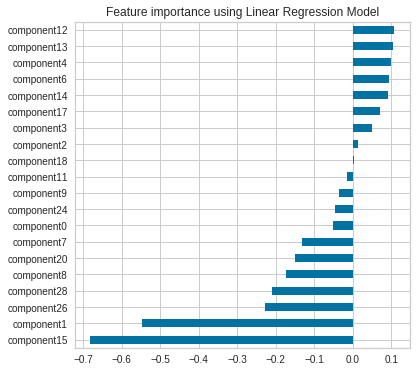

In [104]:
#Ploting feature importance graph

coef = pd.Series(LR.coef_, index = X_train.columns)
imp_coef = coef.sort_values()[:20]
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Regression Model")
plt.savefig('Linear-Regression-Feature-Importance.jpg')
plt.show()

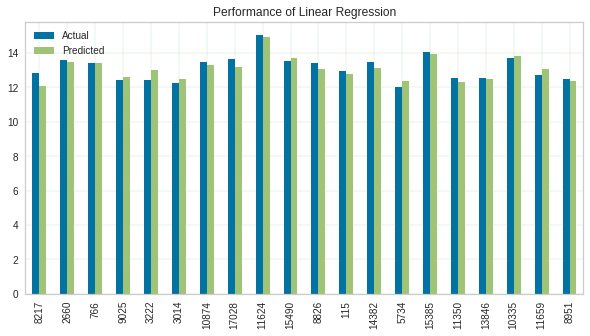

In [106]:

#Visualization of true value and predicted
#y_pred_1.resize(1,15964)
#y_test_1 = y_test_1.values
#y_test_1.resize(1,15964)
df_check = pd.DataFrame({'Actual': y_test_1, 'Predicted': y_pred_1},index = list(range(17044)))
df_check = df_check.sample(20)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='Green')
plt.title('Performance of Linear Regression')
plt.savefig('Linear-Regression-Performance')
plt.show()

# 3.2) Ridge regression

AttributeError: ignored

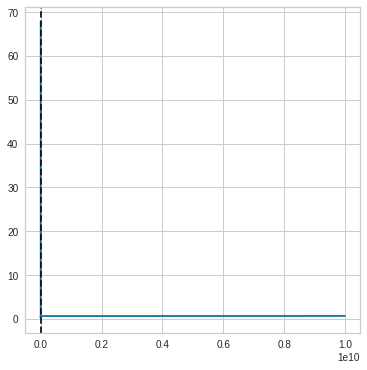

In [107]:
#predicting value of alpha

alphas = 10**np.linspace(10,-2,400)
model = RidgeCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(X_train,y_train)
visualizer.show()

In [108]:
#model object and fitting model
RR=Ridge(alpha=20.336,solver='auto')
RR.fit(X_train,y_train)
y_pred=RR.predict(X_test)

In [109]:
#model evaluation

y_test_2,y_pred_2=remove_neg(y_test,y_pred)
r2_ridge=result(y_test_2,y_pred_2)
print("MSLE : {}".format(r2_ridge[0]))
print("Root MSLE : {}".format(r2_ridge[1]))
print("R2 Score : {} or {}%".format(r2_ridge[2],r2_ridge[3]))
accu['Ridge Regression']=r2_ridge

MSLE : 0.0008989247999210551
Root MSLE : 0.029982074643377418
R2 Score : 0.7360369875741963 or 73.6037%


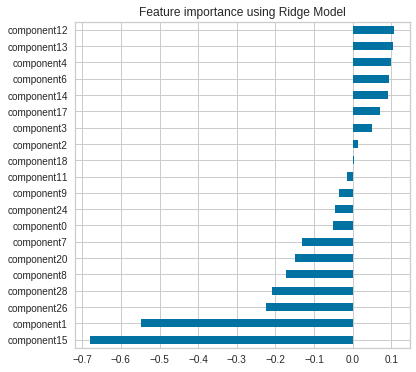

In [110]:

#Visualization of Feature Importance

coef = pd.Series(RR.coef_, index = X_train.columns)
imp_coef = coef.sort_values()[:20]
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Model")
plt.savefig('Ridge-Regression-Feature-Importance.jpg')
plt.show()

# 3.3) Lasso Regression

In [111]:
#model object and fitting it
lasso=Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)


In [112]:
#model evaluation
y_test_3,y_pred_3=remove_neg(y_test,y_pred)
r3_lasso=result(y_test_3,y_pred_3)
print("MSLE : {}".format(r3_lasso[0]))
print("Root MSLE : {}".format(r3_lasso[1]))
print("R2 Score : {} or {}%".format(r3_lasso[2],r3_lasso[3]))
accu['Lasso Regression']=r3_lasso

MSLE : 0.000898945039029407
Root MSLE : 0.029982412161622472
R2 Score : 0.7360326536092456 or 73.6033%


# 3.4) KNN

In [113]:
#estimating MSLE for k=1-9
R_MSLE=[]
for i in range(1,10):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(X_train,y_train)
    y_pred=KNN.predict(X_test)
    error=np.sqrt(mean_squared_log_error(y_test, y_pred))
    R_MSLE.append(error)
    print("K =",i," , Root MSLE =",error)

K = 1  , Root MSLE = 0.029485572083448337
K = 2  , Root MSLE = 0.027095945775403935
K = 3  , Root MSLE = 0.02617269727768366
K = 4  , Root MSLE = 0.02602546108419706
K = 5  , Root MSLE = 0.02590335251684613
K = 6  , Root MSLE = 0.025864681718232967
K = 7  , Root MSLE = 0.02582619923367337
K = 8  , Root MSLE = 0.025848492854471616
K = 9  , Root MSLE = 0.02584768191876778


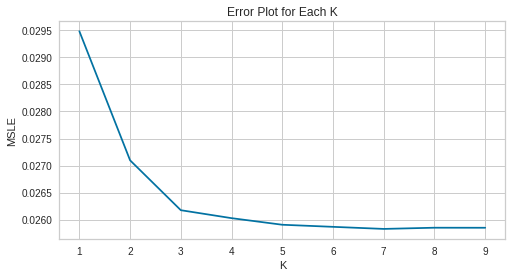

In [118]:
#plotting error

curve = pd.DataFrame(R_MSLE) #elbow curve 
plt.figure(figsize=(8,4))
plt.xticks(list(range(1,10)), list(range(1,10)), rotation='horizontal')
plt.plot(list(range(1,10)),R_MSLE)
plt.xlabel('K')
plt.ylabel('MSLE')
plt.title('Error Plot for Each K')
plt.savefig('KNN-Error-Plot.jpg')
plt.show()

In [119]:
#model implementation
KNN=KNeighborsRegressor(n_neighbors=7) 
KNN.fit(X_train,y_train)
y_pred=KNN.predict(X_test)

In [120]:
#model evaluation
r4_knn=result(y_test,y_pred)
print("MSLE : {}".format(r4_knn[0]))
print("Root MSLE : {}".format(r4_knn[1]))
print("R2 Score : {} or {}%".format(r4_knn[2],r4_knn[3]))
accu['KNN']=r4_knn

MSLE : 0.000666992566857391
Root MSLE : 0.02582619923367337
R2 Score : 0.8049675072496988 or 80.4968%


In [121]:
accu.to_csv('errors.csv')

# 5) Random Forest

In [122]:
RFR = RandomForestRegressor(n_estimators=180,random_state=0, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
RFR.fit(X_train,y_train)
y_pred = RFR.predict(X_test)

In [123]:
r5_rf=result(y_test,y_pred)
print("MSLE : {}".format(r5_rf[0]))
print("Root MSLE : {}".format(r5_rf[1]))
print("R2 Score : {} or {}%".format(r5_rf[2],r5_rf[3]))
accu['RandomForest Regressor']=r5_rf

MSLE : 0.00047883799083435973
Root MSLE : 0.02188236712136874
R2 Score : 0.8634656029480565 or 86.3466%


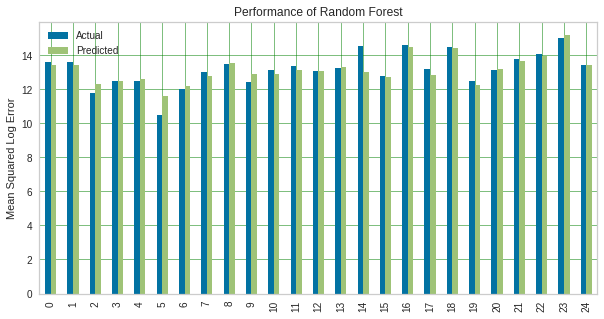

In [124]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check = df_check.head(25)
#round(df_check,2)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of Random Forest')
plt.ylabel('Mean Squared Log Error')
plt.savefig('Random-Forest-Performance.jpg')
plt.show()

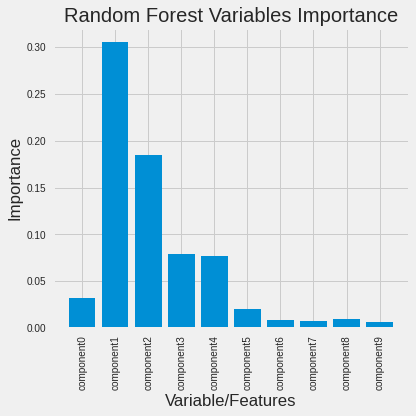

In [125]:
importances=RFR.feature_importances_[:10]
features=X_train.columns[:10]

# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.figure(figsize=(6,6))
plt.bar(x_values, importances, orientation = ('vertical'))
# Tick labels for x axis
plt.xticks(x_values, features, rotation=(90))
# Axis labels and title
plt.ylabel('Importance'); 
plt.xlabel('Variable/Features'); 
plt.title('Random Forest Variables Importance')
plt.tight_layout()
plt.savefig('Random-Forest-Variables-Importances.jpg',dpi=600)
plt.show();

優化模型

In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction import DictVectorizer
import pandas as pd

# datapath = "/Volumes/MacData/MEGA/pythonwork/jupyter_project/Kaggle Dataset/Titanic/train.csv"

# def RandomForestTest():
    # data = pd.read_csv(datapath)
    # X = data[["Pclass","Sex","Age"]]
    # Y = data["Survived"]

    # X["Age"].fillna(X["Age"].mean(),inplace=True)

    # X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25)

# DV = DictVectorizer(sparse=False)
# X_train = DV.fit_transform(X_train.to_dict(orient="records"))
# X_test = DV.transform(X_test.to_dict(orient="records"))
    
    # 實例化隨機森林分類器
RF = RandomForestClassifier()
    
    # 測試超參數優化
RF_param = {"n_estimators":[10,50,100,150,200],"max_depth":[5,10,15,20]}
    
GSCV = GridSearchCV(RF,param_grid=RF_param,cv=5)
GSCV.fit(X_train,y_train.astype('int'))
    
print("accuracy score",GSCV.score(X_test,y_test))
print("The best model param :",GSCV.best_params_)

KeyboardInterrupt: ignored

In [ ]:
RandomForestTest()

# 6) Bagging Regressor

In [127]:
#model implementation
baggReg=BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=20),n_estimators=50, random_state=1,
                         max_samples=1.0, max_features=1.0, bootstrap=False, 
                         bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=-1, verbose=0)
baggReg.fit(X_train,y_train)
y_pred=baggReg.predict(X_test)

In [128]:
#model evaluation
r6_br=result(y_test,y_pred)
print("MSLE : {}".format(r6_br[0]))
print("Root MSLE : {}".format(r6_br[1]))
print("R2 Score : {} or {}%".format(r6_br[2],r6_br[3]))

MSLE : 0.0007500507815046271
Root MSLE : 0.027387054998751274
R2 Score : 0.7870747479214284 or 78.7075%


In [129]:
accu['Bagging Regressor']=r6_br
accu.to_csv('errors.csv')

# 7) Adaboost

In [130]:
#model implementation
ABR = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=24),
    n_estimators=200,learning_rate=0.6
)

ABR.fit(X_train, y_train)
y_pred = ABR.predict(X_test)

In [131]:
#model evaluation
r7_ab=result(y_test,y_pred)
print("MSLE : {}".format(r7_ab[0]))
print("Root MSLE : {}".format(r7_ab[1]))
print("R2 Score : {} or {}%".format(r7_ab[2],r7_ab[3]))

MSLE : 0.0005329422199952791
Root MSLE : 0.023085541362404285
R2 Score : 0.8474559043651968 or 84.7456%


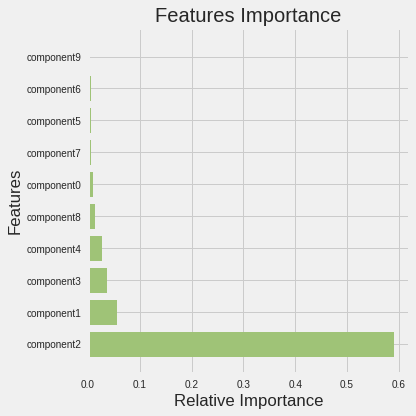

In [132]:
importances=ABR.feature_importances_[:10]
features=X_train.columns[:10]

indices = np.argsort(importances)
indices = [x for x in reversed(indices)]
plt.figure(1)
plt.title('Features Importance')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('Adaboost-Features-Importance2.jpg',dpi=60)
plt.show();

In [133]:
accu['AdaBoost Regressor']=r7_ab
accu.to_csv('errors.csv')


# 8) XGBOOST

In [134]:
#model implementation and fitting data
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.4,
                max_depth = 24, alpha = 5, n_estimators = 200)
xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)

In [135]:
#model evaluation
y_test_1,y_pred_1=remove_neg(y_test,y_pred)
r8_xg=result(y_test_1,y_pred_1)
print("MSLE : {}".format(r8_xg[0]))
print("Root MSLE : {}".format(r8_xg[1]))
print("R2 Score : {} or {}%".format(r8_xg[2],r8_xg[3]))

MSLE : 0.0005678950725194528
Root MSLE : 0.023830549144311652
R2 Score : 0.8383057399677248 or 83.8306%


In [136]:
"""import matplotlib.pyplot as plt
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()""";

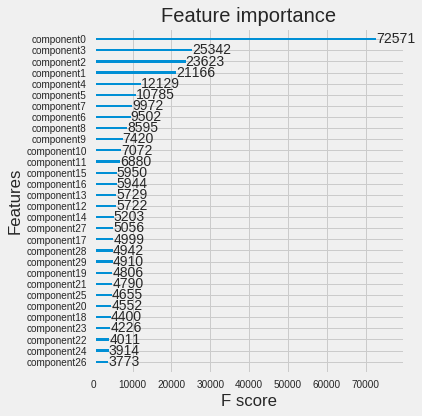

In [137]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.tight_layout()
plt.savefig('XGBoost-Features-Importance.jpg')
plt.show();

In [138]:
accu['XGBoost Regressor']=r8_xg
accu.to_csv('errors.csv')

In [139]:
accu=pd.read_csv('./errors.csv',index_col=0)
accu

,Linear Regression,Ridge Regression,Lasso Regression,KNN,RandomForest Regressor,Bagging Regressor,AdaBoost Regressor,XGBoost Regressor
MSLE,0.000899,0.000899,0.000899,0.000667,0.000479,0.000750,0.000533,0.000568
Root MSLE,0.029980,0.029982,0.029982,0.025826,0.021882,0.027387,0.023086,0.023831
R2 Score,0.736075,0.736037,0.736033,0.804968,0.863466,0.787075,0.847456,0.838306
Accuracy(%),73.607500,73.603700,73.603300,80.496800,86.346600,78.707500,84.745600,83.830600


In [140]:
model_accuracy=accu.loc['Accuracy(%)']

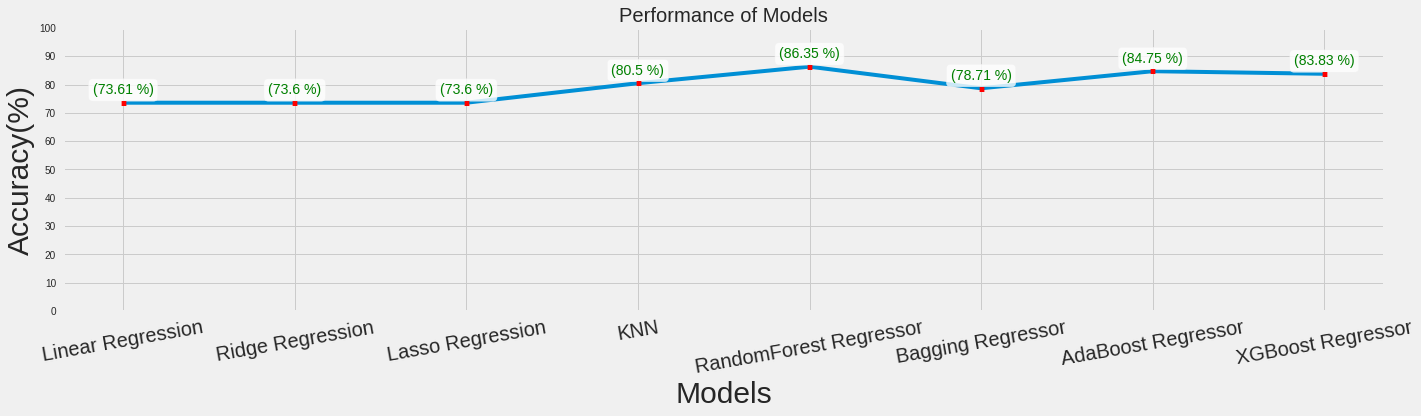

In [141]:
x=list(range(len(model_accuracy)))
y=list(range(0,101,10))
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.figure(figsize=(20,6))
plt.plot(model_accuracy)
plt.yticks(y)
plt.xticks(fontsize=20)
plt.xticks(rotation = (10))
plt.xlabel("Models",fontsize=30)
plt.ylabel("Accuracy(%)",fontsize=30)
plt.title("Performance of Models")
for a,b in zip(x,y):
    b=model_accuracy[a]
    val="("+str(round(model_accuracy[a],2))+" %)"
    plt.text(a, b+4.5, val,horizontalalignment='center',verticalalignment='center',color='green',bbox=props)
    plt.text(a, b+3.5, '.',horizontalalignment='center',verticalalignment='center',color='red',fontsize=50)
plt.tight_layout()
plt.savefig('Overall-Performance.jpg',dpi=600)
plt.show();